# Using Source and Sink Terms for a Chemical Reaction

In [1]:
import openpnm as op
import scipy as sp
import matplotlib.pyplot as plt

Start by creating the network, geometry, phase and physics objects as usual:

In [2]:
pn = op.network.Cubic(shape=[40, 40], spacing=1e-4)
geo = op.geometry.StickAndBall(network=pn, pores=pn.Ps, throats=pn.Ts)
gas = op.phases.Air(network=pn)
phys = op.physics.Standard(network=pn, phase=gas, geometry=geo)

Now add the source and sink models to the physics object.  In this case we'll think of the as chemical reactions.  We'll add one source term and one sink term, meaning one negative reaction rate and one positive reaction rate

In [3]:
gas['pore.concentration'] = 0
phys['pore.sinkA'] = -1e-10
phys['pore.sinkb'] = 1
phys.add_model(propname='pore.sink', model=op.models.physics.generic_source_term.power_law,
               A1='pore.sinkA', A2='pore.sinkb', X='pore.concentration')
phys['pore.srcA'] = 1e-11
phys['pore.srcb'] = 1
phys.add_model(propname='pore.source', model=op.models.physics.generic_source_term.power_law,
               A1='pore.srcA', A2='pore.srcb', X='pore.concentration')

Now we setup a FickianDiffusion algorithm, with concentration boundary conditions on two side, and apply the sink term to 3 pores:

In [4]:
rx = op.algorithms.FickianDiffusion(network=pn)
rx.setup(phase=gas)
rx.set_source(propname='pore.sink', pores=[420, 820, 1220])
rx.set_value_BC(values=1, pores=pn.pores('front'))
rx.set_value_BC(values=1, pores=pn.pores('back'))
rx.run()

Because the network is a 2D cubic, it is convenient to visualize it as an image, so we reshape the 'pore.concentration' array that is produced by the FickianDiffusion algorithm upon running, and turn it into a colormap representing concentration in each pore.

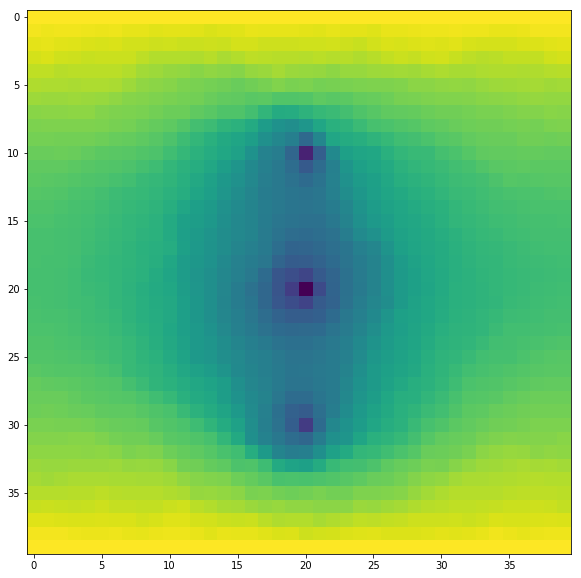

In [5]:
im = sp.reshape(rx['pore.concentration'], [40, 40])
fig = plt.figure(figsize=[10, 10])
plt.imshow(im)

Similarly, for the source term:

In [6]:
rx = op.algorithms.FickianDiffusion(network=pn)
rx.setup(phase=gas)
rx.set_source(propname='pore.source', pores=[420, 820, 1220])
rx.set_value_BC(values=1, pores=pn.pores('front'))
rx.set_value_BC(values=1, pores=pn.pores('back'))
rx.run()

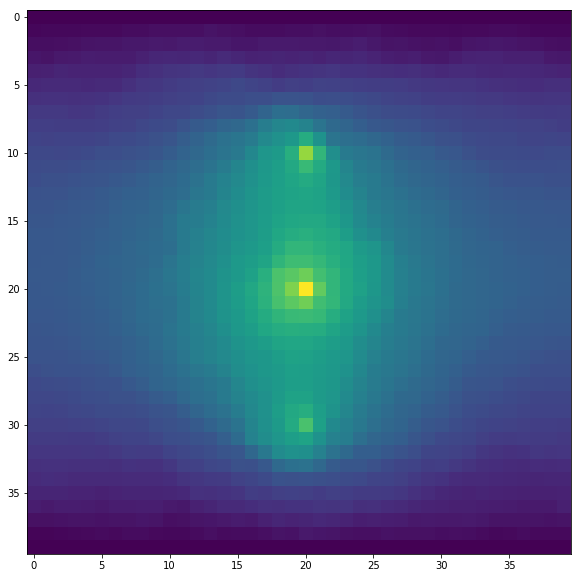

In [7]:
im = sp.reshape(rx['pore.concentration'], [40, 40])
fig = plt.figure(figsize=[10, 10])
plt.imshow(im)